In [1]:
# Instalación de paquetes (Colab ya tiene muchos preinstalados)
!pip install -q tensorflow scikit-learn matplotlib pandas

# Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras


# Parte Teórica

### ¿Qué es una red neuronal artificial?
Es un modelo computacional inspirado en el funcionamiento del cerebro humano, compuesto por capas de nodos o "neuronas" que aprenden patrones a partir de datos.

### ¿Qué es regresión lineal?
Es una técnica estadística que modela la relación entre una variable dependiente (precio) y una o más independientes (habitaciones, tamaño, etc.). En ML, se usa para hacer predicciones numéricas.

### ¿Para qué sirve TensorFlow/Keras?
TensorFlow es una biblioteca de código abierto para computación numérica. Keras es una API que simplifica la construcción de redes neuronales usando TensorFlow como backend.

### ¿Por qué es importante el control de versiones con GitHub?
GitHub permite mantener un historial del código, colaborar con otros, recuperar versiones anteriores y presentar los proyectos de forma profesional.


In [2]:
# Cargar dataset de California Housing
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="Precio")

# Mostrar primeras filas
X.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


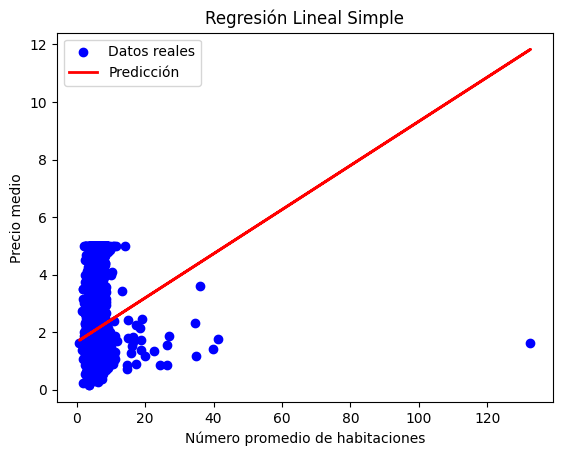

In [3]:
# Usaremos solo la columna AveRooms para regresión lineal simple
X_simple = X[["AveRooms"]]

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Modelo
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

# Predicciones
y_pred = modelo_lineal.predict(X_test)

# Gráfico
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicción')
plt.xlabel('Número promedio de habitaciones')
plt.ylabel('Precio medio')
plt.title('Regresión Lineal Simple')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8335 - mae: 0.9631
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4223 - mae: 0.4583
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3750 - mae: 0.4340
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3611 - mae: 0.4217
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3360 - mae: 0.4053
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3323 - mae: 0.4035
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3123 - mae: 0.3933
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3147 - mae: 0.3917
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3118 - mae: 0.3887
Epoch 10/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3140 - mae: 0.3880
Epoch 11/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3008 - mae: 0.3800
Epoch 12/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2951 - mae: 0.3758
Epoch 13/50
516/516 ━━━━━

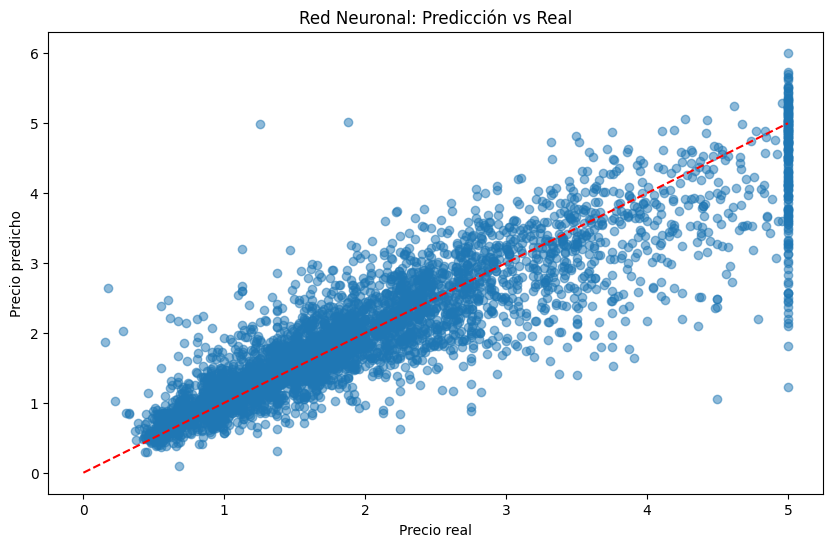

In [4]:
# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelo de red neuronal
modelo_nn = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

modelo_nn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenamiento
modelo_nn.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluación
loss, mae = modelo_nn.evaluate(X_test, y_test)
print("MAE (Error absoluto medio):", mae)

# Predicción y gráfico
y_pred_nn = modelo_nn.predict(X_test).flatten()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.5)
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Red Neuronal: Predicción vs Real')
plt.plot([0, 5], [0, 5], 'r--')
plt.show()


# Conclusiones

- Comprendimos los fundamentos de la regresión lineal y las redes neuronales.
- Aplicamos ambos enfoques para predecir precios de viviendas reales.
- La red neuronal mostró mejor capacidad de aprendizaje con múltiples variables.
- Aprendimos a visualizar y comparar resultados.
- Integramos el uso de GitHub para el control de versiones.
